# Digit Recognition

A Convulational Neural Network using tensorflow for digit recognition.

## 1. Import the Libraries

Import the required libraries.

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

2025-01-27 22:40:10.641634: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-27 22:40:10.646809: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-27 22:40:10.770115: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-27 22:40:10.947788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737997811.092298   22850 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737997811.13

## 2. Load the Dataset

Load the dataset from MNIST(Modified National Institute of Standards and Technology).

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check the shape of the data
train_shape = x_train.shape
test_shape = x_test.shape
print(f"Shape of training data: {train_shape}")
print(f"Shape of testing data: {test_shape}")

Shape of training data: (60000, 28, 28)
Shape of testing data: (10000, 28, 28)


## 3. View Some Images

Take a look at some of the digits for a better understanding.

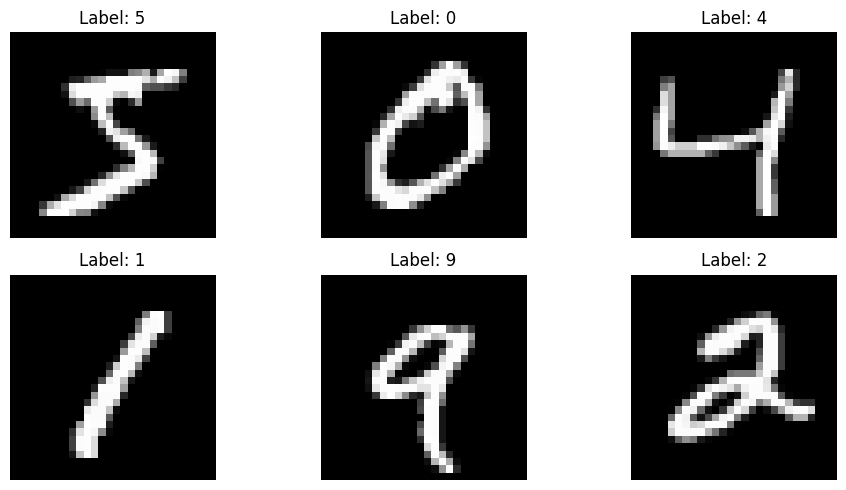

In [3]:
# Lets see some digits
plt.figure(figsize=(10, 5))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 4. Process the Dataset

Normalise the dataset and channel the dimensions.

In [4]:
# Normalise the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add the dimension of 1 since the images are grayscale
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Shape of training data: {x_train.shape}")

Shape of training data: (60000, 28, 28, 1)


## 5. Create the Neural Network

* **models.Sequential**: Creates a linear stack of layers where each layer feeds into the next.

* **layers.Input**: Specifies the input shape of the data (28x28 grayscale images with 1 channel).

* **Conv2D(32, (3, 3), activation='relu')**: Adds a convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation.

* **MaxPooling2D**: Adds a pooling layer that reduces spatial dimensions by taking the maximum value in each 2x2 region.

* **Flatten**: Flattens the 2D feature maps into a 1D array for input to the dense layers.

* **Dense(10, activation='softmax')**: Adds the output layer with 10 neurons (for 10 digits) and softmax activation to produce probabilities for each class.

In [5]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

W0000 00:00:1737997819.448727   22850 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## 6. Compile the Network

* **optimizer='adam'**: Uses the Adam optimizer, which combines the benefits of both momentum and RMSProp for efficient training.

* **loss='sparse_categorical_crossentropy'**: Computes the loss for multi-class classification with integer labels (not one-hot encoded).

* **metrics=['accuracy']**: Tracks the accuracy of the model during training and evaluation as a performance metric.

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 7. Visual Representation of the Network

Plot the model using the built-in **plot_model()** function.

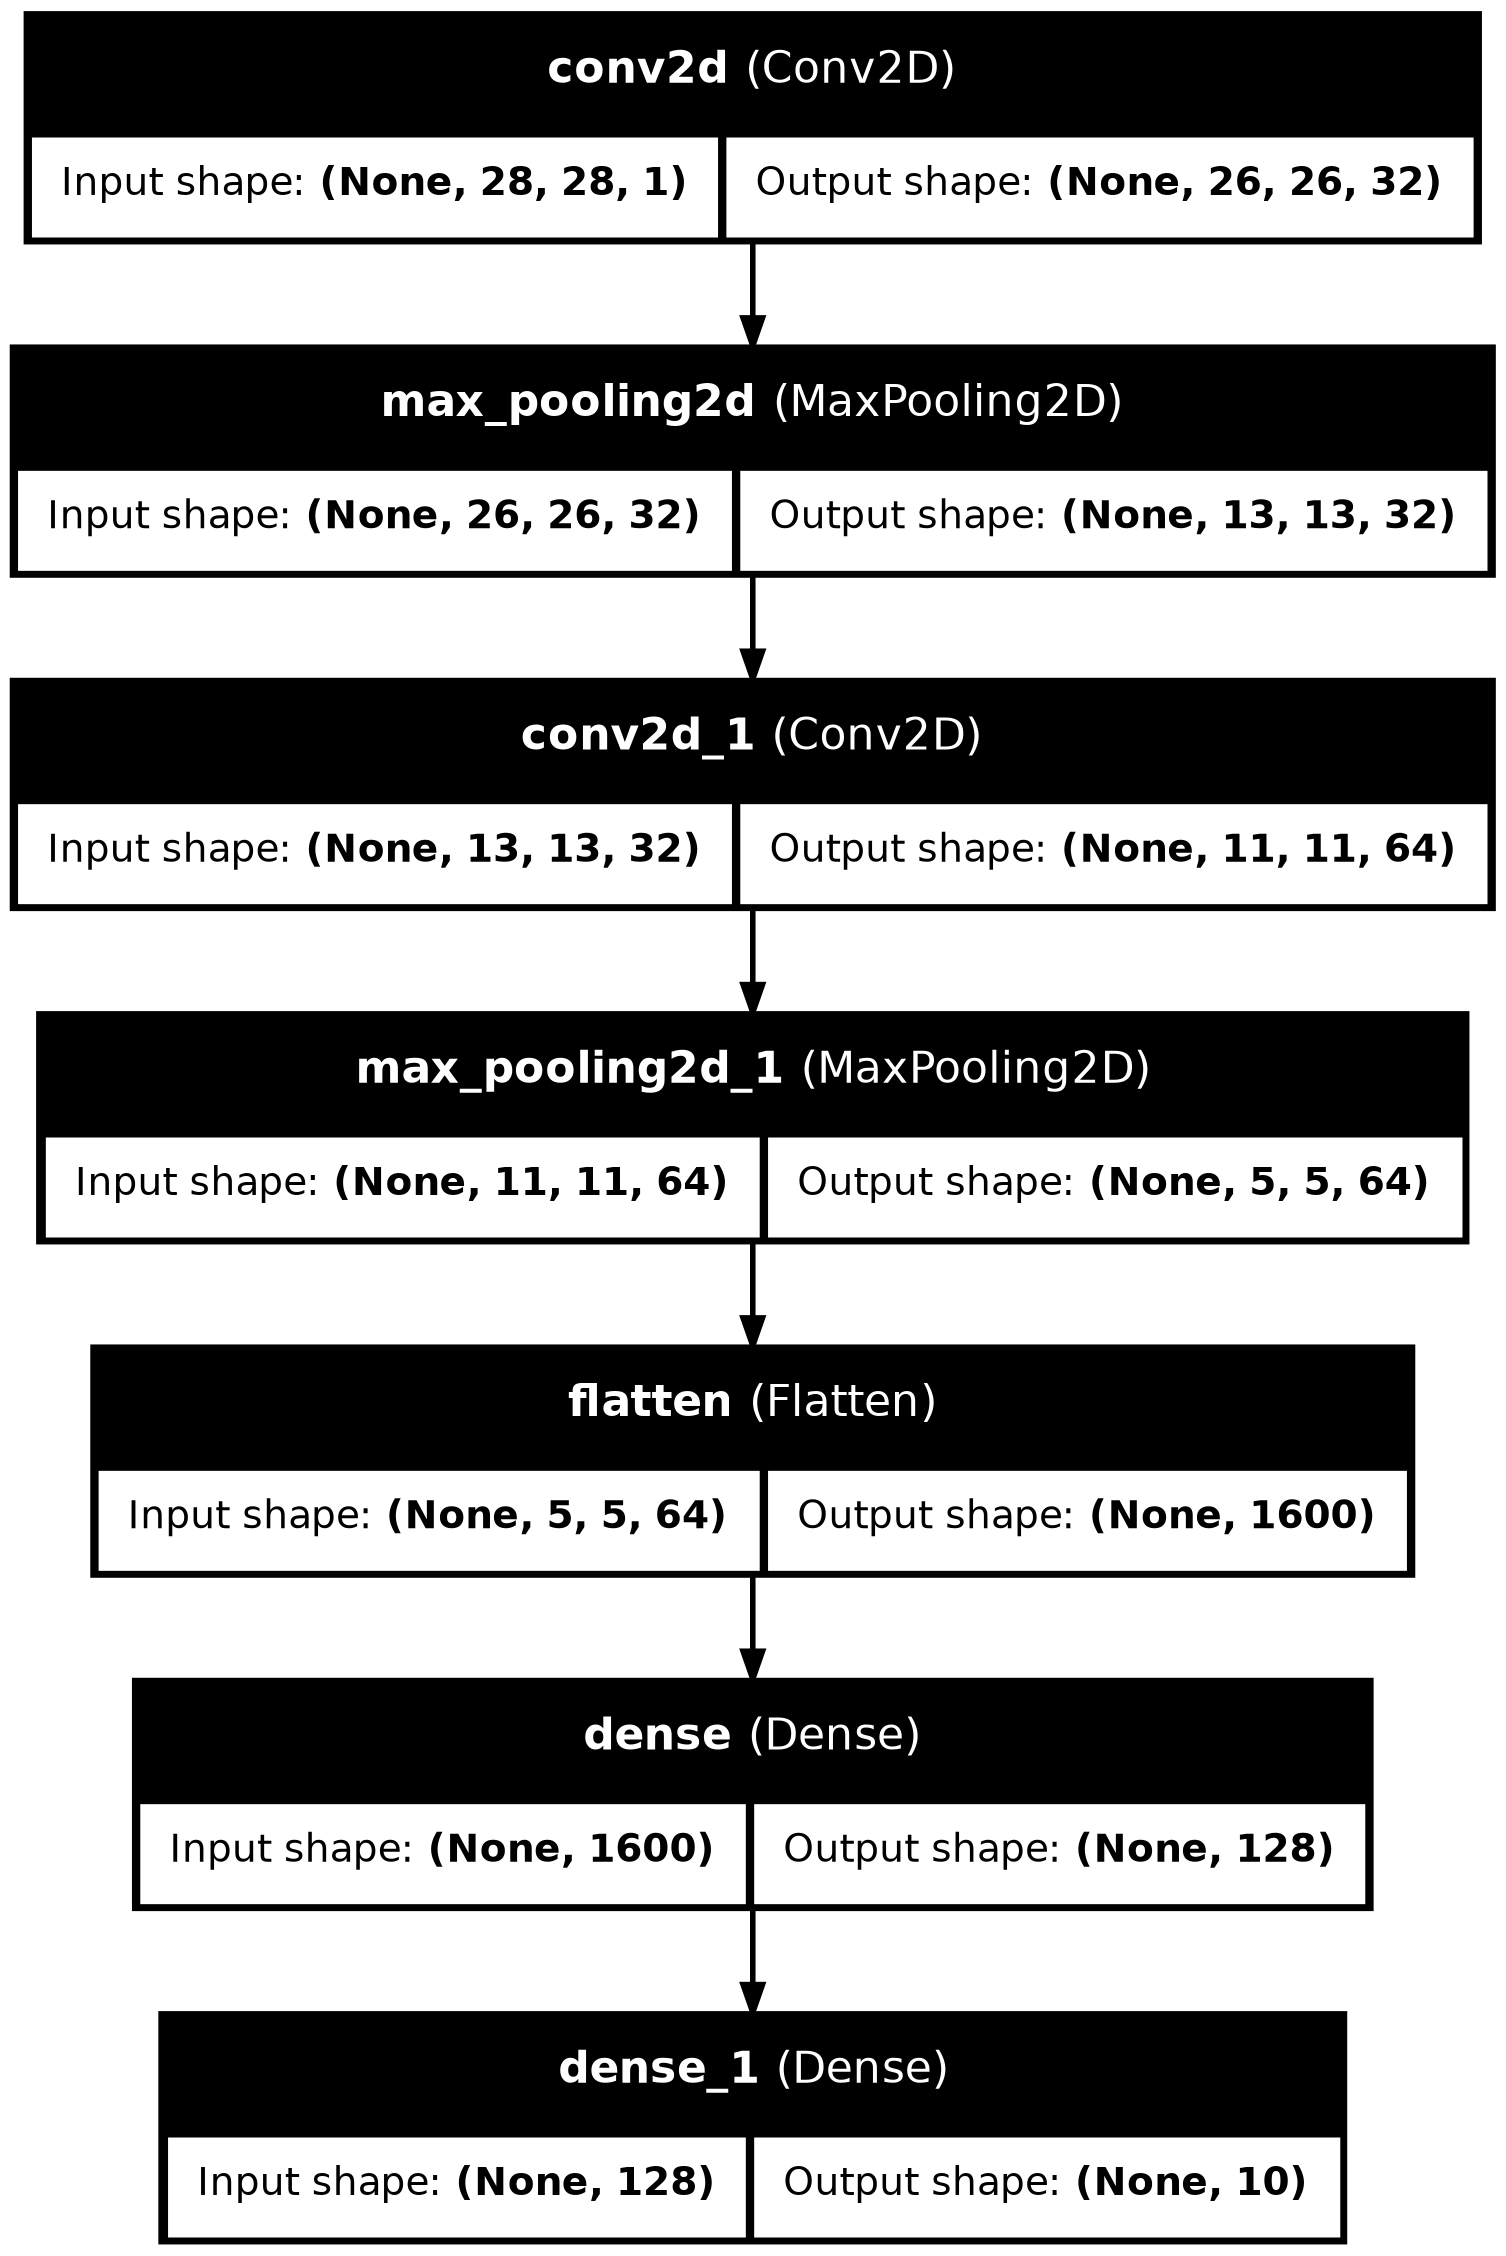

In [7]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

## 8. Train the Network

Train and test the model.

In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9150 - loss: 0.2796 - val_accuracy: 0.9873 - val_loss: 0.0412
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9860 - loss: 0.0457 - val_accuracy: 0.9858 - val_loss: 0.0434
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9901 - loss: 0.0303 - val_accuracy: 0.9898 - val_loss: 0.0319
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9939 - loss: 0.0189 - val_accuracy: 0.9906 - val_loss: 0.0297
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9951 - loss: 0.0148 - val_accuracy: 0.9902 - val_loss: 0.0342
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9973 - loss: 0.0091 - val_accuracy: 0.9912 - val_loss: 0.0277
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9971 - loss: 0.0085 - val_accuracy: 0.9911 - val_loss: 0.0265
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9980 -

## 9. Evaluate the model

Print the test loss and accuracy.

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9894 - loss: 0.0436
Test Accuracy: 0.9915000200271606


## 10. Visualise Training Results

Plot the accuracy and loss after each epoch.

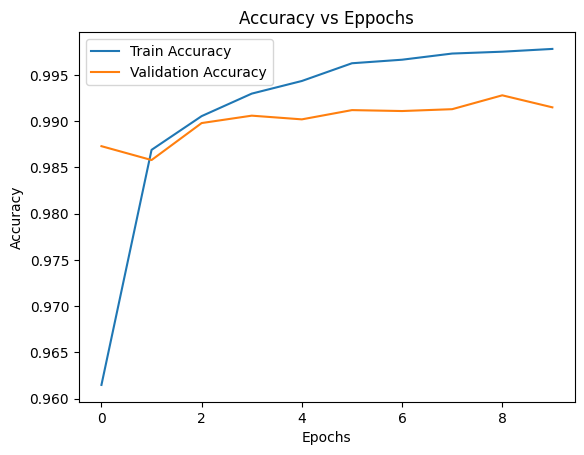

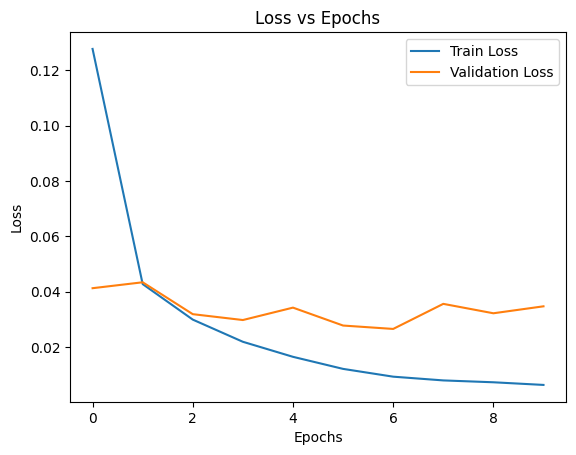

In [10]:
# Accuracy vs Epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Eppochs")
plt.show()

# Loss vs Epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

## 11. Save the Model

Save the model for later use.

In [11]:
model.save('mnist_cnn_model.h5')